# Fundamentals of Supervised Learning

This notebook was written with the desire to soldify machine learning knowledge from
* **CS170** --> Introduction to Machine Learning & Data Mining by Christian Shelton
* **DeepLearning.ai & Stanford ONLINE** --> Machine Learning Specialization by Andrew Ng

In [26]:
# all modules used in this notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

# personal color pallete
c_ = {
    'red': '#ff6188',
    'orange': '#fc9867',
    'yellow': '#ffd866',
    'green': '#a8dd76',
    'blue': '#78dce8',
    'purple': '#ac9df2',
    'grey': '#2c2a2e',
    'white': '#fcfcfa',
    'black': '#211f22' 
}

# global params
matplotlib.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.facecolor'] = c_['black']
plt.rcParams['axes.facecolor'] = c_['black']
plt.rcParams['text.color'] = c_['white']
plt.rcParams['axes.labelcolor'] = c_['white']
plt.rcParams['xtick.color'] = c_['white']
plt.rcParams['ytick.color'] = c_['white']

## Data Generation

This synthetic data represents the performance of **100 students** in a morning university course on machine learning. At the end of a lecture, students were given a pop quiz to assess their understanding of the material. An AI-powered camera estimated the amount of time (in minutes) each student remained focused during the lecture, recorded as the **focus time** (x-axis). The final **quiz scores** were also recorded (y-axis).

The relationship between focus time and quiz scores is modeled using the function:

$$y = (0.08*x - 3)^3 + 65$$

where:
- $y$: Quiz score (percentage)
- $x$: Focus time (minutes)

The following visualizes this relationship using synthetic data generated for 100 students.

In [55]:
def true_model(x):
    return (0.08*x - 5)**3 + 65

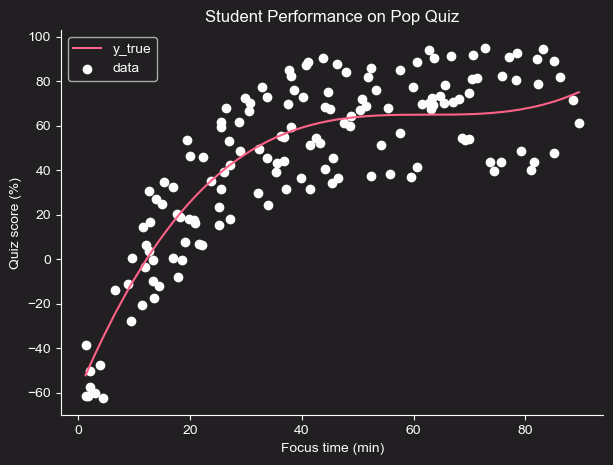

In [56]:
SEED = 819
ERROR = 30

np.random.seed(SEED)
# sample data
n_students = 150
x = np.sort(np.random.uniform(low=1, high=90, size=n_students))
noise = np.random.uniform(low=-ERROR, high=ERROR, size=n_students)

# target function
y_true = true_model(x)
y = y_true + noise

# graph
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x, y_true, c=c_['red'], label='y_true')
ax.scatter(x, y, c=c_['white'], label='data')
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_['white'])
ax.set_title('Student Performance on Pop Quiz')
ax.set_xlabel('Focus time (min)')
ax.set_ylabel('Quiz score (%)')
ax.legend(loc='upper left');

### Supervised Learning

In **supervised learning**, a model is trained (or fitted) to predict the correct output using **labeled data** (input–output pairs). The learning process involves feeding this labeled data into the model so it can learn the relationship between inputs (features) and outputs (targets).

- The choice of model depends on:
  - The type of features data (input variable)
  - The type of target data (output variable)
  - The relationships between features and output
- Supervised learning models are grouped into two main categories:
  - **Regression** → predicts **continuous outcomes** (e.g., price, temperature)
  - **Classification** → predicts **discrete outcomes** (e.g., spam vs. not spam, disease vs. no disease)

Let’s start by exploring the first type: **Regression**.


## Linear Regression for Multiple Features

The hypothesis function is:
$$f(\vec{x}) = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$
$$f(\vec{x}) = \vec{w}^T\vec{x} + b$$

where in each example $\vec{x}$ (e.g., a student):
* $x$: value of each feature
* $w$: weight value for each feature *(controls the importance or influence of each feature on predicted output)*
* $b$: bias unit *(enables the model can fit data not necessarily passing through the origin)*

To simplify code implementation of linear regression, $w_0 = b$ is included in our weight vector. Now $f(\vec{x})$ is
$$f(\vec{x}) = w_0x_0 + w_1x_1 + w_2x_2 ... + w_nx_n$$
Every example vector will have a scalar $1$ (representing $x_0$) in the first dimension to accomdate for the bias unit $w_0$


In [29]:
def linear_predict(X, w):
    return X @ w

In [30]:
def add_ones(arr):
    one_arr = np.ones(arr.shape[0])
    if arr.ndim == 1:
       return np.vstack([one_arr, arr]).T 
    return np.hstack(one_arr.reshape(-1,1), arr)

In [31]:
x_example = add_ones(x)[0]
w_example = [0, 0.87]
# example prediction with 0th example
print('example:')
print(f'[px_0, x_1] -> {x_example}')
print(f'[bias, weight] -> {w_example}')
print(f'f(x_0) = {linear_predict(x_example, w_example)}')

example:
[px_0, x_1] -> [1.         1.32810339]
[bias, weight] -> [0, 0.87]
f(x_0) = 1.155449951093494


### Measuring the Quality of Fit

The **loss** for a single example (the error between the predicted value and the true value) is defined as:

$$L(\hat{y}_i, y_i) = (\hat{y}_i - y_i)^2$$

where:
- $\hat{y}_i = f(\vec{x}_i)$: the predicted value for example $i$  
- $y_i$: the true value for example $i$

The **cost function** (the average loss across all $m$ training examples) is defined as:

$$J(w, X) = \frac{1}{2m} \sum_{i=1}^m L(\hat{y}_i, y_i)$$

The constant $2m$ is used instead of $m$ to simplify the partial derivative when applying gradient descent.  
Dividing by $2$ has no effect on the model’s accuracy. It only makes the math cleaner.


In [32]:
# loss function (squared error)
def loss_se(y_hat, y):
    return (y_hat - y)**2

# cost function (mean squared error)
def cost_mse(y_hat, y):
    return np.sum((y_hat - y)**2)/(2*y.shape[0])

cost over all examples: 156.78335452900262


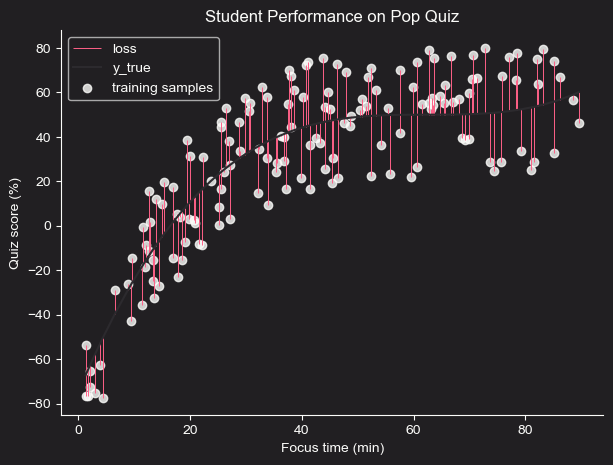

In [33]:
fig, ax = plt.subplots(figsize=(7,5))

mm = np.sort(np.vstack([y, y_true]), axis=0)
ax.vlines(x=x, ymin=mm[0], ymax=mm[1], color=c_['red'], label='loss', linewidth=0.7)
ax.plot(x, y_true, c=c_['grey'], label='y_true')
ax.scatter(x, y, c=c_['white'], label='training samples', alpha=0.8)

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_['white'])

ax.set_title('Student Performance on Pop Quiz')
ax.set_xlabel('Focus time (min)')
ax.set_ylabel('Quiz score (%)')
ax.legend(loc='upper left');

print(f'cost over all examples: {cost_mse(y_true, y)}');

### Splitting Dataset

Now we separate the dataset into three parts with these common proportions:

* **Training set (60%)** → used to train the model  
* **Validation set (20%)** → used to tune hyperparameters and evaluate performance during training  
* **Test set (20%)** → used to assess final performance on unseen data


In [34]:
def train_test_split(X, y, p_train=0.6):
    n = X.shape[0]
    sample_indicies = np.arange(0, n)
    train_mask = np.random.choice(sample_indicies, size=int(p_train * n), replace=False)
    test_mask = sample_indicies[~np.isin(sample_indicies, train_mask)]
    
    return X[train_mask], y[train_mask], X[test_mask], y[test_mask]

In [35]:
# training 50% instead of 60% to show overfitting
np.random.seed(SEED+1)
x_train, y_train, _x, _y = train_test_split(x, y, 0.5)
x_valid, y_valid, x_test, y_test = train_test_split(_x, _y, 0.5)

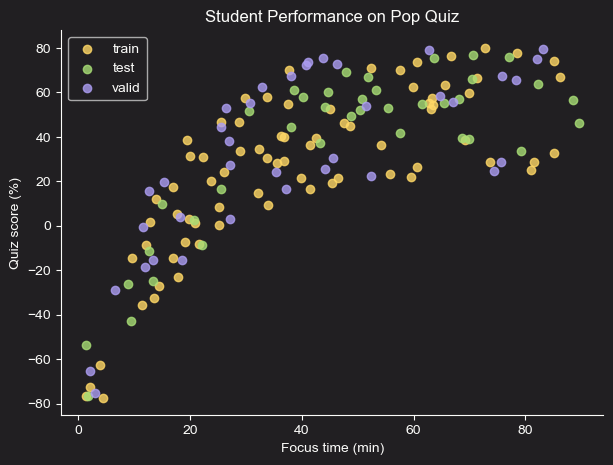

In [36]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x_train, y_train, c=c_['yellow'], label='train', alpha=0.8)
ax.scatter(x_test, y_test, c=c_['green'], label='test', alpha=0.8)
ax.scatter(x_valid, y_valid, c=c_['purple'], label='valid', alpha=0.8)

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_['white'])
ax.set_title('Student Performance on Pop Quiz')
ax.set_xlabel('Focus time (min)')
ax.set_ylabel('Quiz score (%)')
ax.legend(loc='upper left');

### Gradient Descent

Gradient Descent is an optimization algorithm used to train machine learning models. Its purpose is to iteratively adjust a model's weigh values to minimize the cost function $J$.

The graident $\nabla{\vec{J}}$ is a vector of all the partial derivatives of the cost function w.r.t each weight $w_j$.

$$\nabla\vec{J} = \begin{pmatrix}
\\
\frac{dJ}{dw_0}\\\\
\frac{dJ}{dw_1} \\\\
.\\
.\\
. \\\\
\frac{dJ}{dw_n} \\ \\

\end{pmatrix}$$

The cost function expanded is:
$$J(w,X) = \frac{1}{2m}\sum^{m}_{i = 1}(w_0x_{0}^{(i)} + w_1x_{1}^{(i)} + ... + w_nx_{n}^{(i)} - y^{(i)})^2$$

The partial derivatives w.r.t to each weight is:

$$\frac{dJ}{dw_j} = \frac{1}{m}\sum^{m - 1}_{i = 0}(\vec{w}^T\vec{x}^{(i)} - y^{(i)})x_{j}^{(i)}$$
$$\frac{dJ}{dw_0} = \frac{1}{m}\sum^{m - 1}_{i = 0}(\vec{w}^T\vec{x}^{(i)} - y^{(i)})$$

The partial derivatives tell us the direction and magnitude to update each weight and move close to the minimum cost.



In [37]:
def linear_compute_gradient(X, y, w):
    m = X.shape[0]
    n = X.shape[1]
    g_w = np.zeros(n)
    
    y_hat = linear_predict(X, w)
    g_w[0] = np.sum(y_hat - y)/m # for bias unit
    for i in range(1, n):
        g_w[i] = np.sum((y_hat - y) * X[:, i])/m # for all other weights
    
    return g_w

The **update rule** for gradient descent is:

$$
\text{while } \Delta{J} > \epsilon: \;\vec{w} \;\leftarrow\; \vec{w} - \eta \nabla J(\vec{w})
$$

where $\eta < 1$ (e.g., $0.001$).


In [38]:
def linear_gradient_descent(X, y, w, eta=0.001, threshold=0.005, max_iter = 1000):
    message = True
    max_delta = 1e+20 # to prevent infinite divergence
    m = X.shape[0]
    
    cost_list = []
    grad_norm_list = []
    
    iterations = 1
    delta_cost = math.inf
    y_hat = linear_predict(X, w)
    old_cost = cost_mse(y_hat, y)

    while delta_cost >= threshold: # threshold is epsilon
        
        iterations += 1
        g_w = linear_compute_gradient(X, y, w)
        grad_norm_list.append(np.sqrt(np.sum(g_w**2)))
        w = w - eta*g_w
        
        y_hat = linear_predict(X, w)
        new_cost = cost_mse(y_hat, y) 
        
        delta_cost = np.abs(old_cost - new_cost)
        cost_list.append(new_cost)
        old_cost = new_cost
        
        if delta_cost > max_delta:
            print(f'# of iterations (divergent): {iterations}')
            message = False
            break
    
    if message:
        print(f'# of iterations: {iterations}')
    
    return (w, np.array(cost_list), np.array(grad_norm_list))

### Feature Scaling

Feature scaling is a **preprocessing step** where you transform features so that they share similar scales (whether range or distribution).

Common techniques include:
* **Normalization** (Min-Max scaling): rescales all values to a fixed range, usually $[0,1]$
* **Standardization** (Z-score scaling): centers data to mean of $0$ and standard deviation of $1$.

In [39]:
# standardiazation
class StandardScaler():
    def __init__(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    
    def scale(self, X):
        return (X - self.mean)/self.std
        

In [40]:
scaler = StandardScaler(x_train)
x_train_scaled = scaler.scale(x_train)
x_valid_scaled = scaler.scale(x_valid)
x_test_scaled = scaler.scale(x_test)

In [41]:
X_train_scaled = add_ones(x_train_scaled)
X_train = add_ones(x_train)

w_rand = np.random.rand(X_train_scaled.shape[1])
w_rand[0] = 0 # bias unit set to 0

w1, cost_list1, grad_list1 = linear_gradient_descent(X_train_scaled, y_train, w_rand)
w2, cost_list2, grad_list2= linear_gradient_descent(X_train, y_train, w_rand);
print(f'weights with feature scaling: {w1}')
print(f'weights without feature scaling: {w2}')

# of iterations: 2808
# of iterations (divergent): 161
weights with feature scaling: [24.46206877 24.99302156]
weights without feature scaling: [-1.21701218e+07 -6.48471664e+08]


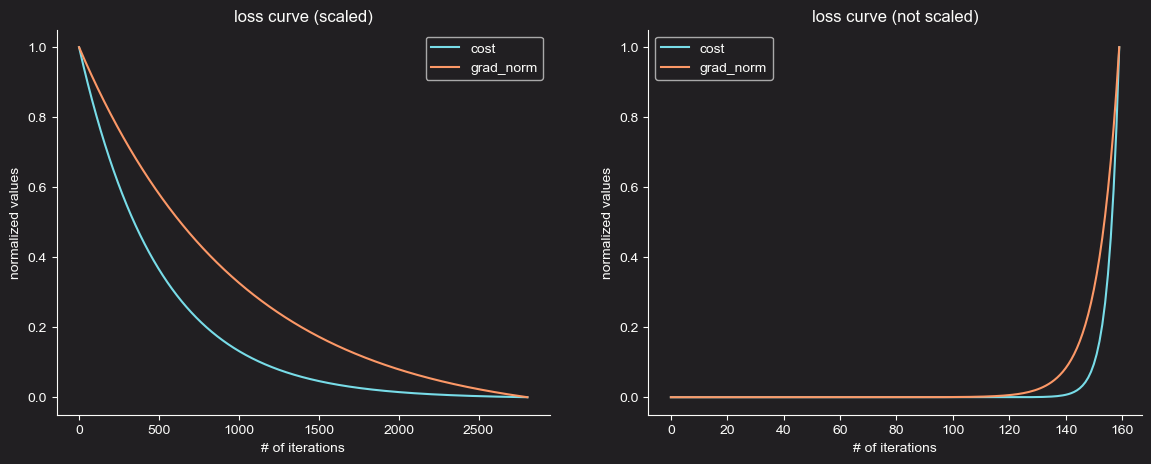

In [42]:
def normalize(X):
        return (X - X.min())/(X.max() - X.min())
        
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cost_arr = [cost_list1, cost_list2]
grad_arr = [grad_list1, grad_list2]
name_arr = ['scaled', 'not scaled']
for i in range(len(cost_arr)):
        axes[i].set_title(f'loss curve ({name_arr[i]})')
        axes[i].set_xlabel('# of iterations')
        axes[i].set_ylabel('normalized values')
        axes[i].plot(np.arange(len(cost_arr[i])), normalize(cost_arr[i]), c=c_['blue'], label='cost')
        axes[i].plot(np.arange(len(grad_arr[i])), normalize(grad_arr[i]), c=c_['orange'], label='grad_norm')
        axes[i].spines[['top', 'right']].set_visible(False)
        axes[i].spines[['bottom', 'left']].set_color(c_['white'])
        axes[i].legend()

As you can see, without feature scaling, gradient descent failed to reach a minimum and instead **increased at each iteration** (diverged). This happened because:

1. Different feature scales cause **elongated contours**.
2. Elongated contours create **imbalanced updates** where

   * high-scale feature dimensions take large steps
   * low-scale feature dimensions take tiny steps
3. Imbalanced steps cause **oscillation**, a zig-zag path across the valley (the area around the minimum point) instead of converging smoothly.
4. High-scale features are too large for the learning rate, resulting in **divergence**—the cost grows rather than shrinks.

Feature scaling is also **important** for several reasons. Most commonly, it:

* **improves gradient descent convergence** *(contours become more spherical)*
* **equalizes feature influence** on the inference of a model *(larger feature values do not always mean greater importance)*
* helps in **understanding feature importance** *(since all features are on the same scale)*

### Model Diagnostics & Tuning

#### Bias Variance Trade-off
The following equation breakdowns the components of the expected MSE for inference:
$$E[y_0 - \hat{f}(x_0)^2]= \text{Var}(\hat{f}(x_0)) + [\text{Bias}(\hat{f}(x_0))]^2 + \text{Var}(\epsilon)$$

* **Variance**: the amount by which $\hat{f}$ would change if we
estimated it using a different training data set.
* **Bias** (squared): error that is introduced when approximating a complicated relationship with a simpler model.
* **Variance of $\epsilon$**: the error term $\epsilon$ comes from
        $$Y = f(x) + \epsilon$$
    which shows that even we find the true relationship $f(x)$ between the target variable and features, _irreducible error_ will always exist (noise created by unknown features).


There are the common 3 cases of bias vs variance:
* High bias & low variance (**underfitting**): model is too simple to capture the complexity of the data, which makes consistent poor predictions. The variance is low as it does not overfit to any specific dataset.
* Low bias & high variance (**overfitting**): model is complex enough to capture the data complexity, but now is easily sensitive to noise, leading to poor generalization. 
* Balanced bias & variance: model is just fit enough to capture the data's pattern without overfitting or underfitting
* Ideally, the goal is to **pick a model that has _low variance_ and _low bias_**

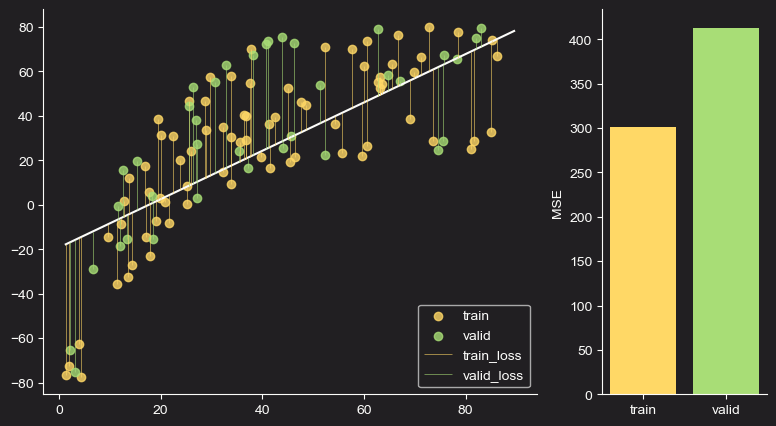

In [43]:
y_pred_train = linear_predict(add_ones(x_train_scaled), w1)
y_pred_valid = linear_predict(add_ones(x_valid_scaled), w1)
y_pred = linear_predict(add_ones(scaler.scale(x)), w1)

train_err = np.sort(np.vstack([y_train, y_pred_train]), axis=0)
valid_err = np.sort(np.vstack([y_valid, y_pred_valid]), axis=0)

fig, ax = plt.subplots(1, 2, figsize=(7+(7/3), 5), gridspec_kw={'width_ratios': [3, 1]})

ax[0].plot(x, y_pred, c=c_['white'])
ax[0].scatter(x_train, y_train, c=c_['yellow'], label='train', alpha=0.8)
ax[0].scatter(x_valid, y_valid, c=c_['green'], label='valid', alpha=0.8)
ax[0].vlines(x=x_train, ymin=train_err[0], ymax=train_err[1], color=c_['yellow'], label='train_loss', linewidth=0.4)
ax[0].vlines(x=x_valid, ymin=valid_err[0], ymax=valid_err[1], color=c_['green'], label='valid_loss', linewidth=0.4)

ax[1].bar(['train', 'valid'],
          [cost_mse(y_train, y_pred_train), cost_mse(y_valid, y_pred_valid)],
          color=[c_['yellow'], c_['green'], c_['red']])
ax[1].set_ylabel('MSE')

for axes in ax.flat:
    axes.spines[['top', 'right']].set_visible(False)
    axes.spines[['bottom', 'left']].set_color(c_['white'])

ax[0].legend(loc='lower right');

* The linear regression model shows _high bias_, as a simple linear function fails to capture the complex, non-linear relationship between the feature and target variable, leading to underfitting and high training MSE.
* The model shows _low variance_, meaning its predictions are not sensitive to changes in the training dataset.
* As expected, validation MSE is significantly higher than the training MSE. This means the model is unable to make good generalization.

#### Creating a `LinearRegression()` Class

In [44]:
class LinearRegression():
    
    def __init__(self):
        self.weight = None # w_0 + w_1 + ... + w_n
        self.cost_list = None # L
        self.grad_list = None # gradient norm
        
    def _cost_mse(self, y_hat, y):
        return np.sum((y_hat - y)**2)/(2*y.shape[0])
    
    def _add_ones(self, arr):
        one_arr = np.ones(arr.shape[0])
        if arr.ndim == 1:
            return np.vstack([one_arr, arr]).T 
        return np.hstack([one_arr.reshape(-1,1), arr])
        
    def fit(self, X, y, eta=0.01, max_iter=1000):
        
        m = X.shape[0]
        n = X.shape[1]
        
        X_new = self._add_ones(X)
        
        w_rand = np.random.rand(n + 1)
        w_rand[0] = 0
        self.weight = w_rand
        
        self._gradient_descent(X_new , y, eta=eta, threshold=0.005, max_iter=max_iter)


    def predict(self, X, external=True):
        if external:
            return self._add_ones(X) @ self.weight
        else:
            return X @ self.weight

    def _compute_gradient(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        
        y_hat = self.predict(X, external=False)
        g_w = np.zeros(n)
        
        g_w[0] = np.sum(y_hat - y)/m
        
        for i in range(1, n):
            g_w[i] = np.sum((y_hat - y) * X[:, i])/m
        
        return g_w
    
    def _gradient_descent(self, X, y, eta, threshold, max_iter):
        delta_cost = math.inf
        y_hat = self.predict(X, external=False)
        old_cost = self._cost_mse(y_hat, y)
        max_delta = 1e+20
        
        self.cost_list = [old_cost]
        self.grad_list = [self._compute_gradient(X, y)]
        
        iterations = 0
        while delta_cost >= threshold:
            
            iterations += 1
            
            g_w = self._compute_gradient(X, y)
            self.grad_list.append(np.sqrt(np.sum(g_w**2)))
            self.weight =self.weight - eta*g_w
            
            y_hat = self.predict(X, external=False)
            new_cost = self._cost_mse(y_hat, y) 
            
            delta_cost = np.abs(old_cost - new_cost)
            self.cost_list.append(new_cost)
            old_cost = new_cost
            
            if delta_cost > max_delta:
                print(f'[error]: gradient descent diverged')
                break
        
        print(f'[complete]: # of iter: {iterations}')

#### Hyperparameter Tuning w/ Polynomial Regression

In [45]:
def generate_degree(x, d_num):
    xd_list = [x]
    for d in range(2, d_num+1):
        xd_list.append(np.round(x**d, 5))
    
    return np.vstack(xd_list).T
    

In [46]:
degree = 5
train_valid_error = np.zeros((degree, 2))
fitted_model = []
for i in range(degree):
    X_scaled = generate_degree(scaler.scale(x), i+1)
    X2_train_scaled = generate_degree(x_train_scaled, i+1)
    X2_valid_scaled = generate_degree(x_valid_scaled, i+1)
    
    model = LinearRegression()
    
    model.fit(X2_train_scaled, y_train)
    fitted_model.append(model.predict(X_scaled))
    
    train_valid_error[i, 0] = cost_mse(model.predict(X2_train_scaled), y_train)
    train_valid_error[i, 1] = cost_mse(model.predict(X2_valid_scaled), y_valid)

[complete]: # of iter: 395
[complete]: # of iter: 917
[complete]: # of iter: 933
[complete]: # of iter: 1221
[complete]: # of iter: 1218


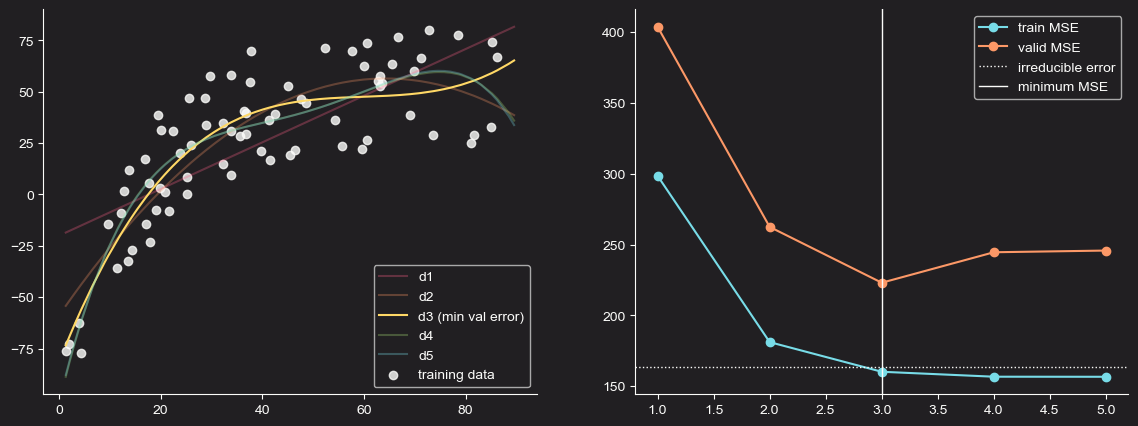

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
opti_degree = train_valid_error[:, 1].argmin() + 1
c_iter = iter(c_)
alpha_val = 0.3
label_val = None


for i in range(degree):
    if i == opti_degree - 1:
        alpha_val = 1; label_val = f'd{i+1} (min val error)'
    else:
        alpha_val = 0.3; label_val = f'd{i+1}'
        
    ax[0].plot(x, fitted_model[i], c=c_[next(c_iter)], alpha = alpha_val, label=label_val)

ax[0].scatter(x_train, y_train, c=c_['white'], label='training data', alpha = 0.8)

ax[1].plot(np.arange(1, degree + 1), train_valid_error[:, 0], label='train MSE', c=c_['blue'], marker='o')
ax[1].plot(np.arange(1, degree + 1), train_valid_error[:, 1], label='valid MSE',c=c_['orange'], marker='o')
ax[1].axhline(y=cost_mse(true_model(x_train), y_train), color=c_['white'], linestyle=':', linewidth=1, label='irreducible error')
ax[1].axvline(x=opti_degree, color=c_['white'], linewidth=1, label='minimum MSE')

for axes in ax.flat:
    axes.spines[['top', 'right']].set_visible(False)
    axes.spines[['bottom', 'left']].set_color(c_['white'])

ax[0].legend(loc='lower right');
ax[1].legend(loc='upper right');

* The decrease in train MSE results from the polynomial regression model's increased flexibility, which better captures the non-linear relationship between the feature and target variable.
* However, beyond a certain point, increasing the degrees of freedom (e.g., polynomial degree) leads to _overfitting_, where the model captures noise or patterns specific to the training data, causing the training MSE to continue decreasing while generalization suffers (increase in valid MSE)
* A degree of freedom of 3 appears optimal for the model, as it achieves the lowest validation MSE, indicating strong generalization to unseen data.

### Evaluating Model Performance

In [48]:
X_opti_train_scaled = generate_degree(x_train_scaled, opti_degree)
X_opti_cv_scaled = generate_degree(x_valid_scaled, opti_degree)
X_opti_test_scaled = generate_degree(x_test_scaled, opti_degree)
model = LinearRegression()
model.fit(X_opti_train_scaled, y_train)

[complete]: # of iter: 933


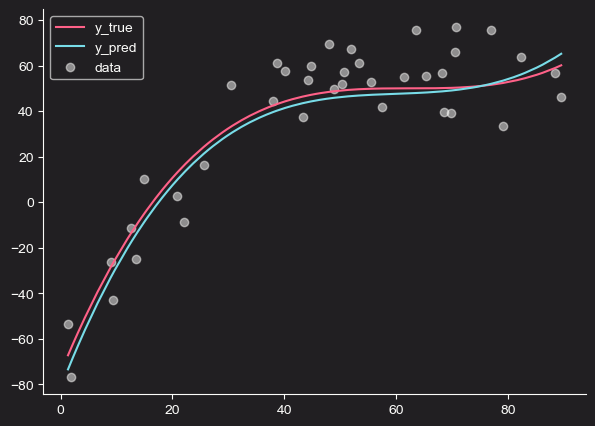

In [49]:
fig, ax = plt.subplots(figsize=(7,5))

X_scaled = generate_degree(scaler.scale(x), opti_degree)
y_pred = model.predict(X_scaled)
ax.plot(x, y_true, c=c_['red'], label='y_true')
ax.plot(x, y_pred, c=c_['blue'], label='y_pred' )
ax.scatter(x_test, y_test, c=c_['white'], label='data', alpha = 0.5)

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_['white'])
ax.legend();

To evaluate the performance of the estimated model, we can compare its test MSE to the "expected performance," which is the test MSE of the true model in this case (usually unknown). This comparison helps assess how well the estimated model generalizes relative to the ideal benchmark.

In [50]:
y_pred_opti = model.predict(X_opti_test_scaled)
y_pred_true = (0.08*x_test - 5)**3 + 80
print(f'polynomial regression model (d={opti_degree}):',cost_mse(y_pred_opti, y_test))
print(f'true model:',cost_mse(y_pred_true, y_test))

polynomial regression model (d=3): 108.56790161223364
true model: 442.10923234446625


The estimated polynomial regression model achieved a test MSE of 107.35, slightly higher than the true model's test MSE by approximately 12.65. This small difference suggests the model generalizes well to unseen data, indicating a good balance between fitting the training data and avoiding overfitting.

## Logistic Regression

* error analysis: look at a specific example that is being mis calssified
* regularization
* classification metrics